In [41]:
from tracktour import load_tiff_frames
import networkx as nx

im = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/Fluo-N2DL-HeLa/01')
seg = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/Fluo-N2DL-HeLa/01_ERR_SEG')
sol = nx.read_graphml('/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/Fluo-N2DL-HeLa_01/matched_solution.graphml', node_type=int)

Loading TIFFs: 100%|██████████| 91/91 [00:00<00:00, 310.03it/s]


In [7]:
sol.nodes[403]

{'t': 8,
 'y': 504.6015325670498,
 'x': 900.0191570881226,
 'label': 38,
 'enter_exit_cost': 126.03201149425286,
 'div_cost': 47.98215854263214,
 'NodeFlag.TRUE_POS': True,
 'NodeFlag.NON_SPLIT': False,
 'NodeFlag.FALSE_POS': False}

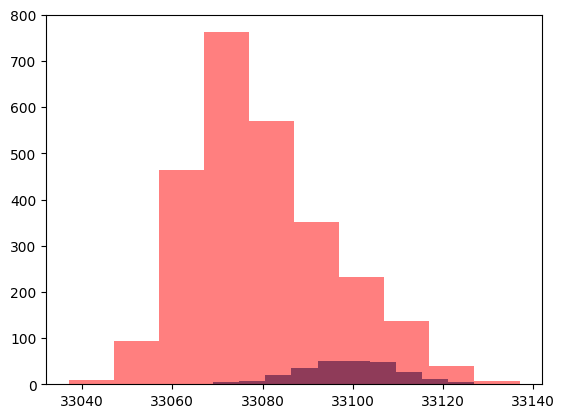

In [22]:
import matplotlib.pyplot as plt

# mask of furthest parent
label_mask = seg[8] == 38
plt.hist(im[9][label_mask].ravel())
# rough bounding box of cell
plt.hist(im[9, 482:528, 859:917].ravel(), color='r', alpha=0.5)
plt.show()

/home/ddon0001/miniconda3/envs/trexp/lib/python3.10/site-packages/skimage/filters/rank/generic.py:268: UserWarning: Bad rank filter performance is expected due to a large number of bins (33138), equivalent to an approximate bitdepth of 15.0.
  image, footprint, out, mask, n_bins = _preprocess_input(image, footprint,


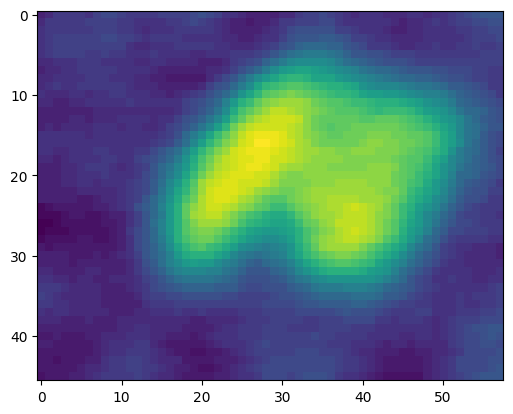

In [42]:
# watershed doesn't need binarized image
import numpy as np
from skimage.filters.rank import mean
from skimage.morphology import disk


filter_disk = disk(5)
region_of_interest = im[9, 482:528, 859:917]
filtered = mean(region_of_interest, filter_disk)

plt.imshow(filtered)

mask = np.zeros_like(im[9], dtype=bool)
mask[482:528, 859:917] = True
filtered_frame = im[9]
filtered_frame[mask] = filtered.ravel()
markers = np.zeros_like(filtered_frame)
markers[500, 885] = 2
markers[503, 898] = 1

from skimage.segmentation import watershed, chan_vese

# other_labels = chan_vese(filtered)
# plt.imshow(other_labels)
# labels = watershed(-filtered_frame, markers=markers, mask=mask)


# plt.imshow(labels[482:528, 859:917])
# Pierre was also right that we need to consider
# when the centerpoint is in "the middle" and we therefore
# need two seeds... maybe we take the midpoint of both parents
# to closest children post-split?
# how will that work with phase contrast/bright-field images

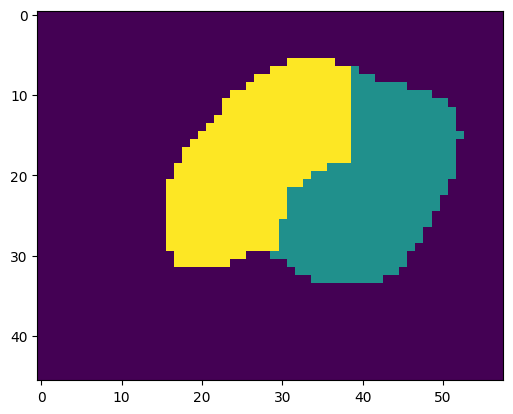

In [49]:
other_labels = chan_vese(filtered)
mask[482:528, 859:917] = other_labels
labels = watershed(-filtered_frame, markers=markers, mask=mask)
plt.imshow(labels[482:528, 859:917])

/home/ddon0001/miniconda3/envs/trexp/lib/python3.10/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filenam

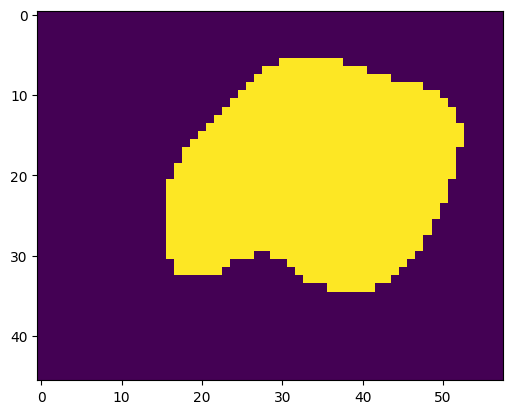

In [44]:
from cellpose import models
model = models.Cellpose(gpu=False, model_type="cyto3")


masks_pred, flows, styles, diams = model.eval([filtered], diameter=0, channels=[0,0])
plt.imshow(masks_pred[0])

In [50]:
# um ok but wb BF and PhC images

from tracktour import load_tiff_frames
import networkx as nx

im = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/BF-C2DL-MuSC/01')
seg = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/BF-C2DL-MuSC/01_ERR_SEG')
sol = nx.read_graphml('/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/BF-C2DL-MuSC_01/matched_solution.graphml', node_type=int)

Loading TIFFs: 100%|██████████| 1375/1375 [00:06<00:00, 216.65it/s]


In [51]:
sol.nodes[3648]

{'t': 1289,
 'y': 171.2735849056604,
 'x': 874.1933962264151,
 'label': 4,
 'enter_exit_cost': 110.47146226415096,
 'div_cost': 78.11681803792779,
 'NodeFlag.TRUE_POS': True,
 'NodeFlag.NON_SPLIT': False,
 'NodeFlag.FALSE_POS': False}

In [61]:
from skimage.filters.rank import mean
from skimage.morphology import disk

bbox = np.s_[153:208, 849:907]
parent_frame = im[1289]
child_frame = im[1290]

# mean filter
filter_disk = disk(5)
region_of_interest = child_frame[bbox]
filtered = mean(region_of_interest, filter_disk)

masks_pred, flows, styles, diams = model.eval([filtered], diameter=0, channels=[0,0])
# cellpose segment

# watershed split?

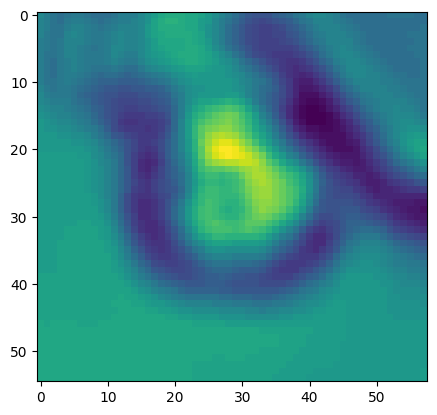

In [62]:
plt.imshow(filtered)

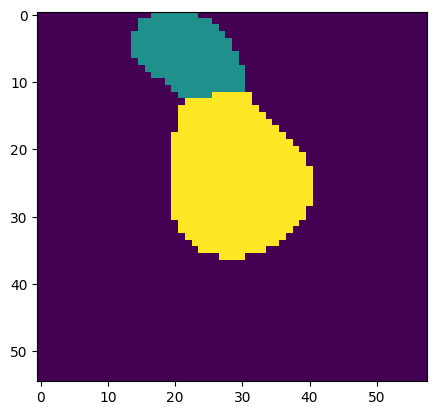

In [63]:
plt.imshow(masks_pred[0])

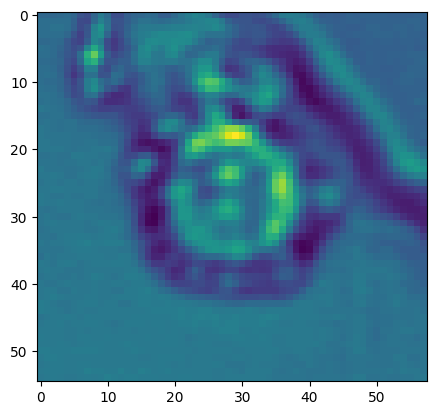

In [53]:
plt.imshow(region_of_interest)

In [55]:
from cellpose import models
model = models.Cellpose(gpu=False, model_type="cyto3")

/home/ddon0001/miniconda3/envs/trexp/lib/python3.10/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filenam

In [10]:
import networkx as nx
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from tracktour import load_tiff_frames

merge_fate_df = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/merge_fates.csv')
length_df = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/merge_lengths.csv')

def get_coords(node_info):
    return np.asarray([node_info[c] for c in (['z', 'y', 'x'] if 'z' in node_info else ['y', 'x'])])

count_cant_pick_child = 0
count_can_pick_child = 0
count_using_parent = 0

ds_names = []
merge_ids = []
projected_child_one = []
projected_child_two = []
using_parents = []
for ds_name in merge_fate_df.ds_name.unique():
    ds, seq = ds_name.split('_')
    solution = nx.read_graphml(f'/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/{ds_name}/matched_solution.graphml', node_type=int)
    seg = load_tiff_frames(f'/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/{ds}/{seq}_ERR_SEG')

    merge_nodes = length_df[length_df.ds_name == ds_name]
    for length_row in merge_nodes.itertuples():
        merge_id = length_row.merge_id
        merge_length = length_row.length

        parent_ids = list(solution.predecessors(merge_id))
        parent_one_info = solution.nodes[parent_ids[0]]
        parent_two_info = solution.nodes[parent_ids[1]]
        using_parent = False

        # need to find the children of the split
        # we want to do this because if the cell needs to be split
        # the merge node centroid will likely be smack bang in the middle
        # so it won't lead to a good split with watershed
        if merge_length <= 2:
            # follow the merge to the end
            parent = merge_id
            children = list(solution.successors(parent))
            while len(children) == 1:
                parent = children[0]
                children = list(solution.successors(parent))
            # merge just terminates so we use the two parents
            if len(children) == 0:
                split_child_one_info = parent_one_info
                split_child_two_info = parent_two_info
                using_parent = True
            else:
                split_child_one_info = solution.nodes[children[0]]
                split_child_two_info = solution.nodes[children[1]]
        # very long merge, we just use two parents
        else:
            split_child_one_info = parent_one_info
            split_child_two_info = parent_two_info
            using_parent = True
        
        # project the proposed two cell centroids
        parent_one_coords = get_coords(parent_one_info)
        parent_two_coords = get_coords(parent_two_info)
        split_child_one_coords = get_coords(split_child_one_info)
        split_child_two_coords = get_coords(split_child_two_info)
        parent_coords = [parent_one_coords, parent_two_coords]
        child_coords = [split_child_one_coords, split_child_two_coords]
        dist_matrix = cdist(parent_coords, child_coords)
        parent_one_pair, parent_two_pair = np.argmin(dist_matrix, axis=1)
        if parent_one_pair == parent_two_pair:
            count_cant_pick_child += 1
        else:
            # using the children, we predict the centers of the two cells in the next frame
            if using_parent:
                projected_child_one_coords = parent_one_coords
                projected_child_two_coords = parent_two_coords
            else:
                pair_one_displacement = (child_coords[parent_one_pair] - parent_one_coords) / (split_child_one_info['t'] - parent_one_info['t'])
                pair_two_displacement = (child_coords[parent_two_pair] - parent_two_coords) / (split_child_two_info['t'] - parent_two_info['t'])
                
                projected_child_one_coords = parent_one_coords + pair_one_displacement
                projected_child_two_coords = parent_two_coords + pair_two_displacement
            ds_names.append(ds_name)
            merge_ids.append(merge_id)
            projected_child_one.append(projected_child_one_coords)
            projected_child_two.append(projected_child_two_coords)
            using_parents.append(using_parent)

projected_children_df = pd.DataFrame({
    'ds_name': ds_names,
    'merge_id': merge_ids,
    'projected_child_one_coords': projected_child_one,
    'projected_child_two_coords': projected_child_two,
    'using_parents': using_parents
})
        

Loading TIFFs: 100%|██████████| 189/189 [00:10<00:00, 17.39it/s]


In [15]:
projected_children_df.to_csv('/home/ddon0001/PhD/experiments/merge_resolution/projected_children.csv', index=False)

In [16]:
projected_children_df = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/projected_children.csv')

In [25]:
# what do we know about the projected coords now
projected_children_df['child_one_overlap_merge'] = False
projected_children_df['child_two_overlap_merge'] = False
projected_children_df['child_one_overlap_other'] = False
projected_children_df['child_two_overlap_other'] = False
for ds_name in projected_children_df.ds_name.unique():
    ds, seq = ds_name.split('_')
    ds_children = projected_children_df[projected_children_df.ds_name == ds_name]
    seg = load_tiff_frames(f'/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/{ds}/{seq}_ERR_SEG')
    sol = nx.read_graphml(f'/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/{ds_name}/matched_solution.graphml', node_type=int)
    for row in ds_children.itertuples():
        merge_id = row.merge_id
        first_cell_list = row.projected_child_one_coords.lstrip('[').lstrip(' ').rstrip(']').split(' ')
        first_cell = []
        for coord_str in first_cell_list:
            if len(coord_str.strip(' ')):
                first_cell.append(float(coord_str))
        first_cell_int = tuple([int(x) for x in first_cell])

        second_cell_list = row.projected_child_two_coords.lstrip('[').lstrip(' ').rstrip(']').split(' ')
        second_cell = []
        for coord_str in second_cell_list:
            if len(coord_str.strip(' ')):
                second_cell.append(float(coord_str))
        second_cell_int = tuple([int(x) for x in second_cell])

        merge_info = sol.nodes[merge_id]
        merge_label = merge_info['label']
        frame_of_interest = seg[merge_info['t']]
        if frame_of_interest[first_cell_int] == merge_label:
            projected_children_df.at[row.Index, 'child_one_overlap_merge'] = True
        elif frame_of_interest[first_cell_int] != 0:
            projected_children_df.at[row.Index, 'child_one_overlap_other'] = True
        if frame_of_interest[second_cell_int] == merge_label:
            projected_children_df.at[row.Index, 'child_two_overlap_merge'] = True
        elif frame_of_interest[second_cell_int] != 0:
            projected_children_df.at[row.Index, 'child_two_overlap_other'] = True
        
        
        

Loading TIFFs: 100%|██████████| 189/189 [00:10<00:00, 17.67it/s]


In [38]:
no_overlaps = projected_children_df[(projected_children_df.child_one_overlap_merge == False) & (projected_children_df.child_two_overlap_merge == False)]
for row in no_overlaps.itertuples():
    merge_v = row.merge_id
    sol = nx.read_graphml(f'/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/{row.ds_name}/matched_solution.graphml', node_type=int)
    length_info = length_df[(length_df.ds_name == row.ds_name) & (length_df.merge_id == merge_v)]
    print(length_info.length.values[0])
    print(sol.nodes[merge_v])
    print(row.projected_child_one_coords)
    print(row.projected_child_two_coords)
    print('#' * 40)

0
{'t': 53, 'y': 478.7765151515151, 'x': 190.6628787878788, 'label': 76, 'enter_exit_cost': 122.97755681818184, 'div_cost': 22.44729032823072, 'NodeFlag.TRUE_POS': True, 'NodeFlag.NON_SPLIT': False, 'NodeFlag.FALSE_POS': False}
[442.7114295 183.0284928]
[479.83322588 181.15777455]
########################################
6
{'t': 1330, 'y': 223.04918032786884, 'x': 903.7295081967212, 'label': 6, 'enter_exit_cost': 107.24446721311485, 'div_cost': 16.105578582041343, 'NodeFlag.TRUE_POS': True, 'NodeFlag.NON_SPLIT': False, 'NodeFlag.FALSE_POS': False}
[220.71276596 877.93617021]
[220.55395683 890.86810552]
########################################
0
{'t': 1369, 'y': 266.0, 'x': 946.0, 'label': 6, 'enter_exit_cost': 79.9799999999999, 'div_cost': 26.262602643943232, 'NodeFlag.TRUE_POS': True, 'NodeFlag.NON_SPLIT': False, 'NodeFlag.FALSE_POS': False}
[273.20570475 935.02915601]
[269.96704816 920.19444444]
########################################
2
{'t': 1093, 'y': 806.0188457008245, 'x': 774.2

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f5ba7188730>>
Traceback (most recent call last):
  File "/home/ddon0001/miniconda3/envs/trexp/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


3
{'t': 238, 'y': 285.9230769230769, 'x': 190.36263736263737, 'label': 214, 'enter_exit_cost': 304.5802197802198, 'div_cost': 34.05650275769534, 'NodeFlag.TRUE_POS': True, 'NodeFlag.NON_SPLIT': False, 'NodeFlag.FALSE_POS': False}
[277.90196078 194.07189542]
[293.9  194.95]
########################################
2
{'t': 283, 'y': 177.86075949367088, 'x': 477.0886075949367, 'label': 218, 'enter_exit_cost': 284.5772151898734, 'div_cost': 37.63527950201126, 'NodeFlag.TRUE_POS': True, 'NodeFlag.NON_SPLIT': False, 'NodeFlag.FALSE_POS': False}
[173.1152615 470.2457648]
[183.22507661 483.50602656]
########################################
3
{'t': 261, 'y': 167.89017341040463, 'x': 272.7514450867052, 'label': 142, 'enter_exit_cost': 268.6242774566474, 'div_cost': 20.64130579886591, 'NodeFlag.TRUE_POS': True, 'NodeFlag.NON_SPLIT': False, 'NodeFlag.FALSE_POS': False}
[171.02631579 268.83333333]
[171.10215054 282.8172043 ]
########################################


In [37]:
both_overlap = projected_children_df[(projected_children_df.child_one_overlap_merge == True) & (projected_children_df.child_two_overlap_merge == True)]
correct_fates = []
for row in both_overlap.itertuples():
    merge_fate_info = merge_fate_df[(merge_fate_df.ds_name == row.ds_name) & (merge_fate_df.v == row.merge_id)]
    correct_fates.append(merge_fate_df.correct_fate.values[0])
print(pd.Series(correct_fates).value_counts())

introduce    68
Name: count, dtype: int64
